### Dataset overview

It's called the Oxford-IIIT Pet Dataset that contains 7,349 images of cats and dogs from 37 different breeds.

This notebook was executed on Kaggle.


In [1]:
from fastai.vision.all import *

In [2]:
!pip list | grep fastai

fastai                                2.7.10


`untar_data` is a thin wrapper for FastDownload.get . It downloads and extracts url 

In [4]:
path = untar_data(URLs.PETS)/"images"

In [5]:
def is_cat(x):
    return x[0].isupper()

In [7]:
data_loaders = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=is_cat,
    item_tfms=Resize(224),
)

In [9]:
learner = vision_learner(data_loaders, resnet34, metrics=error_rate)
learner.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.127307,0.016962,0.006089,01:28


epoch,train_loss,valid_loss,error_rate,time
0,0.073610,0.019007,0.005413,01:20


## Testing the fresh trained model

In [13]:
import ipywidgets as widgets

In [14]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

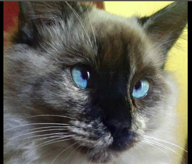

In [15]:
img = PILImage.create(uploader.data[0])
img.to_thumb(192)

In [17]:
# using the model
is_cat_, _, probs = learner.predict(img)

print(f"Is this a cat?: {is_cat_}.")
print(f"Probability it's a cat: {probs[1].item():.3f}")

Is this a cat?: True.
Probability it's a cat: 1.000
